In [1]:
# Importig the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore harmless warnings

import warnings
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns",None)

# Import psql to run queries

import pandasql as psql

In [2]:
# Load the mobile data 

mobiledata= pd.read_csv(r"C:\Users\Dell\Documents\AI-PROJECT\train.csv", header = 0)

# Copy to back-up files

mobiledata_bk1= mobiledata.copy()

# Display first five records

mobiledata.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
# Display the dataset information

mobiledata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
# Display the unique values for all the variables 

mobiledata.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [5]:
# Displaying duplicate values in the given dataset,if available

mobiledata.duplicated().any()

False

In [6]:
# Count the missing values by each variable, if available

mobiledata.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [7]:
# Display the size of dataset

mobiledata.shape

(2000, 21)

In [8]:
# Display the columns dataset

mobiledata.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [9]:
# Display the discriptive statistics

mobiledata.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [10]:
# Display the count of values for 'price_range'

mobiledata['price_range'].value_counts

<bound method IndexOpsMixin.value_counts of 0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64>

In [11]:
# Count the target or dependent variable by '0' & '1' and
# their proportion(>=10:1,then the dataset is imbalance dataset)

price_range_count = mobiledata.price_range.value_counts()
print('Class 0:', price_range_count[0])
print('Class 1:', price_range_count[1])
print('Proportion:', round(price_range_count[0] / price_range_count[1], 2), ': 1')
print ('Total  records:', len(mobiledata))

Class 0: 500
Class 1: 500
Proportion: 1.0 : 1
Total  records: 2000


In [12]:
# Identifying the independent and dependent variable

IndepVar = []
for col in mobiledata.columns:
    if col != 'price_range':
        IndepVar.append(col)
        
TargetVar = 'price_range'     

x = mobiledata[IndepVar]
y = mobiledata[TargetVar]

In [13]:
# Identifying the independent variable

x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [14]:
# Identifying the target variable

y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [15]:
# Split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Display the shape for train & test data

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1400, 20), (600, 20), (1400,), (600,))

In [16]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler=MinMaxScaler(feature_range=(0,1))

x_train=mmscaler.fit_transform(x_train)
x_train=pd.DataFrame(x_train)

x_test=mmscaler.fit_transform(x_test)
x_test=pd.DataFrame(x_test)

In [17]:
# Load the results file for RGRResults

RGRResults = pd.read_csv(r"C:\Users\Dell\Downloads\RGRResults.csv",header=0)

# Displaying the RGRResults

RGRResults

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


# comparision of all regressions

In [18]:
# Build the Regression / Regressor models

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR

# Create objects of Regression / Regressor models with default hyper-parameters

ModelMLR = LinearRegression()
ModelDCR = DecisionTreeRegressor()
ModelRFR = RandomForestRegressor()
ModelETR = ExtraTreesRegressor()
ModelKNN = KNeighborsRegressor(n_neighbors=5)
ModelBRR = BayesianRidge()
ModelSVR = SVR()

# Evalution matrix for all the algorithms

MM = [ModelMLR, ModelDCR, ModelRFR, ModelETR, ModelKNN, ModelBRR, ModelSVR] 
#MM = [ModelMLR, ModelDCR, ModelRFR, ModelETR]

for models in MM:
    
    # Fit the model with train data
    
    models.fit(x_train, y_train)
    
    # Predict the model with test data

    y_pred = models.predict(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # Evaluation metrics for Regression analysis

    from sklearn import metrics

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))
    
    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    # Evaluation of MAPE 

    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')
    
    # Calculate Adjusted R squared values 

    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    RGRResults = RGRResults.append(new_row, ignore_index=True)
    #-------------------------------------------------------------------------------------------

Model Name:  LinearRegression()
Mean Absolute Error (MAE): 0.268
Mean Squared Error (MSE): 0.104
Root Mean Squared Error (RMSE): 0.322
R2_score: 0.918174
Root Mean Squared Log Error (RMSLE): -1.132
Mean Absolute Percentage Error (MAPE): inf %
Adj R Square:  0.917347
------------------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 0.182
Mean Squared Error (MSE): 0.182
Root Mean Squared Error (RMSE): 0.426
R2_score: 0.85694
Root Mean Squared Log Error (RMSLE): -0.853
Mean Absolute Percentage Error (MAPE): nan %
Adj R Square:  0.855494
------------------------------------------------------------------------------------------------------------
Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 0.182
Mean Squared Error (MSE): 0.081
Root Mean Squared Error (RMSE): 0.284
R2_score: 0.936422
Root Mean Squared Log Error (RMSLE): -1.258
Mean Absolute Percentage Error (MAPE): na

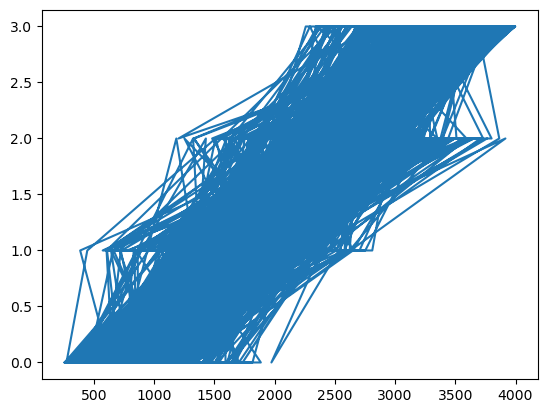

In [19]:
# Plotting the graph between the 'ram' and 'price_range'

x=mobiledata['ram']
y=mobiledata['price_range']
plt.plot(x,y)

In [22]:
# Display first five records

RGRResults

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,LinearRegression(),0.268146,0.917347,0.322347,inf,0.103908,-1.132125,0.918174
1,DecisionTreeRegressor(),0.181667,0.855494,0.426224,NaN,0.181667,-0.852791,0.856940
2,"(DecisionTreeRegressor(max_features=1.0, rando...",0.181633,0.935779,0.284140,NaN,0.080736,-1.258287,0.936422
3,"(ExtraTreeRegressor(random_state=1133343901), ...",0.176667,0.944663,0.263754,NaN,0.069566,-1.332737,0.945217
4,KNeighborsRegressor(),0.722667,0.406386,0.863867,inf,0.746267,-0.146336,0.412325
5,BayesianRidge(),0.268199,0.917315,0.322411,inf,0.103949,-1.131929,0.918142
6,SVR(),0.283634,0.904987,0.345609,inf,0.119445,-1.062448,0.905938


In [21]:
# Display the final results

Results = pd.DataFrame({'price_range_A':y_test, 'price_range_P':y_pred})

# Merge two Dataframes on index of both the dataframes

ResultsFinal =mobiledata_bk1.merge(Results, left_index=True, right_index=True)

# Display 10 records randomly

ResultsFinal.sample(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,price_range_A,price_range_P
1385,1805,1,0.5,0,0,0,29,0.2,182,4,2,758,891,1276,19,4,17,0,1,0,1,1,1.028223
1034,1949,1,1.4,0,7,0,57,0.3,145,7,11,951,1178,356,5,3,19,0,0,0,0,0,0.424983
529,1821,0,0.9,0,9,1,12,0.3,114,1,18,97,1803,2430,7,4,6,1,1,1,2,2,2.244601
1221,1263,1,2.0,0,0,0,5,0.4,146,6,3,954,1609,1958,9,6,4,1,1,1,2,2,1.336163
1788,1424,0,0.5,1,16,1,23,0.6,80,4,18,1399,1663,1053,14,11,16,1,1,1,1,1,1.069846
198,609,0,0.5,0,3,0,26,0.3,93,4,4,938,1948,1866,11,10,14,1,1,1,1,1,1.348524
199,1905,0,0.6,1,9,1,36,0.4,119,3,20,825,1542,1287,13,4,16,1,0,0,1,1,1.216147
741,1972,0,1.2,1,0,0,37,0.7,102,2,1,715,1648,2870,16,0,17,0,0,0,3,3,2.481140
368,1864,0,1.4,0,8,1,46,0.7,178,1,12,168,981,2686,11,7,18,1,1,1,2,2,2.177093
973,516,1,0.7,1,1,0,30,0.9,138,1,12,126,698,3731,17,13,15,0,0,0,2,2,2.128723
